In [1]:
import numpy as np
import matplotlib 
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
housing_data = pd.read_csv('/Users/saksham_diwan/Desktop/Housing.csv')
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_data_filtered = housing_data.get(['price','area'])
housing_data_filtered 

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [4]:
housing_data_unit_change = housing_data_filtered.assign(price_in_mil = housing_data_filtered.get('price')/1000000)
housing_data_unit_change = housing_data_unit_change.assign(area_in_1000_sqft = housing_data_unit_change.get('area')/1000)
housing_data_unit_change

,price,area,price_in_mil,area_in_1000_sqft
0,13300000,7420,13.30000,7.42
1,12250000,8960,12.25000,8.96
2,12250000,9960,12.25000,9.96
3,12215000,7500,12.21500,7.50
4,11410000,7420,11.41000,7.42
...,...,...,...,...
540,1820000,3000,1.82000,3.00
541,1767150,2400,1.76715,2.40
542,1750000,3620,1.75000,3.62
543,1750000,2910,1.75000,2.91


In [5]:
x_train = np.array(housing_data_unit_change.get('area_in_1000_sqft'))
y_train = np.array(housing_data_unit_change.get('price_in_mil'))

In [6]:
x_train_dummy = x_train.reshape(-1,1)
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train_dummy)

In [7]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_norm, y_train)

SGDRegressor()

In [8]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w:{w_norm} and b:{b_norm}")

model predictions for w:[1.00590855] and b:[4.76685322]


In [12]:
pred = w_norm * x_norm + b_norm
pred

array([[5.81976415],
       [6.53424413],
       [6.99819218],
       [5.85687999],
       [5.81976415],
       [5.85687999],
       [6.35794388],
       [9.89322796],
       [6.13524882],
       [5.04497092],
       [8.50138383],
       [5.16095793],
       [5.41612935],
       [4.00108782],
       [5.9960644 ],
       [5.16095793],
       [5.43932675],
       [6.32082803],
       [4.51143067],
       [5.35581611],
       [4.38152522],
       [5.69681792],
       [6.11205141],
       [4.49287275],
       [6.46001245],
       [5.41148987],
       [5.16095793],
       [6.49480855],
       [6.06565661],
       [4.92898391],
       [5.84528129],
       [5.62490597],
       [4.64133612],
       [5.14240001],
       [5.55067428],
       [5.62490597],
       [5.84852893],
       [6.55280205],
       [5.16095793],
       [5.16095793],
       [5.41612935],
       [5.32797922],
       [5.38365299],
       [5.16095793],
       [5.16095793],
       [5.16095793],
       [5.16095793],
       [5.439

In [13]:
plotting_df = pd.DataFrame().assign(area_in_1000_sqft = x_train, price_in_mil = y_train, y_pred=pred)
plotting_df

,area_in_1000_sqft,price_in_mil,y_pred
0,7.42,13.30000,5.819764
1,8.96,12.25000,6.534244
2,9.96,12.25000,6.998192
3,7.50,12.21500,5.856880
4,7.42,11.41000,5.819764
...,...,...,...
540,3.00,1.82000,3.769114
541,2.40,1.76715,3.490745
542,3.62,1.75000,4.056762
543,2.91,1.75000,3.727358


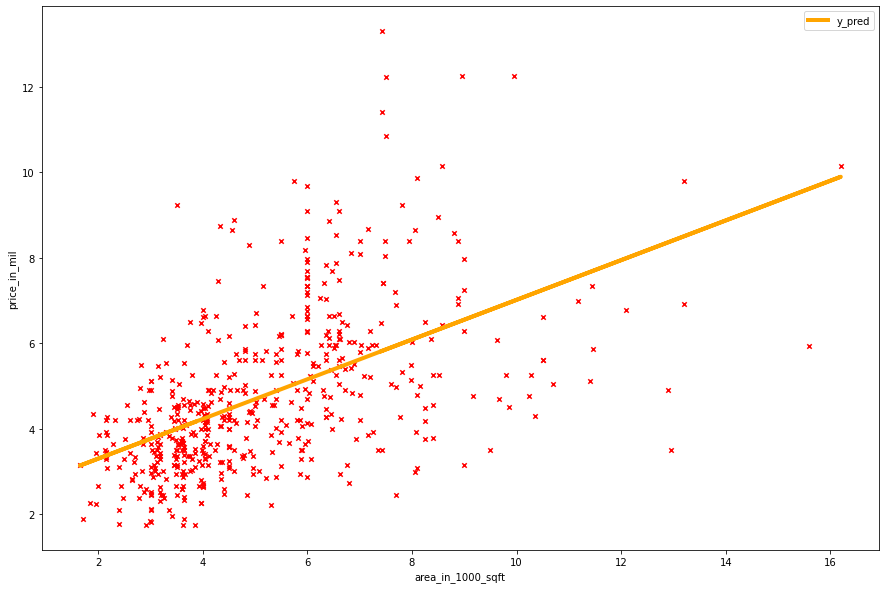

In [14]:
ax = plotting_df.plot(kind='scatter', x='area_in_1000_sqft', y='price_in_mil', marker='x', color='red', figsize=(15,10));
plotting_df.plot(kind='line', x='area_in_1000_sqft', y='y_pred', ax=ax, color='orange', lw=4);